In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# # LLM Self-Preference and Self-Recognition Replication Study
# # Based on "LLM Evaluators Recognize and Favor Their Own Generations"

# import openai
# import anthropic
# import pandas as pd
# import numpy as np
# import json
# import time
# import random
# from typing import Dict, List, Tuple, Any
# import matplotlib.pyplot as plt
# import seaborn as sns
# from collections import defaultdict
# import warnings
# warnings.filterwarnings('ignore')

# # Configuration
# class Config:
#     def __init__(self):
#         # API Keys - Replace with your actual keys
#         self.openai_api_key = "your-openai-api-key-here"
#         self.anthropic_api_key = "your-anthropic-api-key-here"
        
#         # Model configurations
#         # Note: GPT-4.1-nano doesn't exist - using available models
#         self.models = {
#             'gpt-4': 'gpt-4',  # Or 'gpt-4-0613' if you have access
#             'gpt-3.5-turbo': 'gpt-3.5-turbo',  # Alternative if GPT-4 not available
#             'claude-3-haiku': 'claude-3-haiku-20240307'
#         }
        
#         # Experiment parameters
#         self.n_samples = 20  # Increased for more robust results
#         self.tasks = ['summarization', 'poetry', 'recipes', 'molecular_biology']
#         self.measurement_types = ['pairwise', 'individual']

# # Initialize clients
# config = Config()
# openai_client = openai.OpenAI(api_key=config.openai_api_key)
# anthropic_client = anthropic.Anthropic(api_key=config.anthropic_api_key)

# # [Rest of the code remains the same until the main execution section]

# # For Google Colab execution
# if __name__ == "__main__":
#     # First, install required packages in Colab
#     print("Installing required packages...")
#     import subprocess
#     import sys
    
#     # Check if running in Colab
#     try:
#         import google.colab
#         IN_COLAB = True
#         # Install packages
#         subprocess.check_call([sys.executable, "-m", "pip", "install", 
#                               "openai", "anthropic", "pandas", "numpy", 
#                               "matplotlib", "seaborn", "scipy"])
#     except:
#         IN_COLAB = False
#         print("Not running in Colab. Make sure packages are installed.")
    
#     # Get API keys from user
#     if IN_COLAB:
#         from getpass import getpass
#         print("\n🔑 API Key Setup")
#         print("-" * 40)
#         openai_key = getpass("Enter your OpenAI API key: ")
#         anthropic_key = getpass("Enter your Anthropic API key: ")
        
#         # Update configuration
#         config.openai_api_key = openai_key
#         config.anthropic_api_key = anthropic_key
        
#         # Reinitialize clients with new keys
#         openai_client = openai.OpenAI(api_key=config.openai_api_key)
#         anthropic_client = anthropic.Anthropic(api_key=config.anthropic_api_key)
    
#     # Run the experiment
#     print("\n🚀 Starting experiment...")
#     try:
#         evaluator = LLMEvaluator()
#         results = evaluator.run_experiment()
#         analysis = evaluator.analyze_results()
        
#         print("\n✅ Experiment completed successfully!")
        
#         # Additional analysis for the specific questions
#         print("\n📊 TASK-SPECIFIC INSIGHTS")
#         print("="*60)
        
#         # Compare self-preference strength across tasks
#         pairwise_df = pd.DataFrame(results['pairwise_preference'])
#         task_preference = pairwise_df.groupby(['task', 'evaluator'])['self_preferred'].mean()
        
#         print("\nSelf-Preference Strength by Task:")
#         for task in config.tasks:
#             print(f"\n{task.upper()}:")
#             task_data = task_preference[task]
#             for model, rate in task_data.items():
#                 print(f"  {model}: {rate*100:.1f}% self-preference")
        
#         # Compare GPT vs Claude
#         print("\n🔍 MODEL COMPARISON: GPT vs Claude")
#         print("-"*40)
        
#         gpt_models = [m for m in config.models.keys() if 'gpt' in m.lower()]
#         claude_models = [m for m in config.models.keys() if 'claude' in m.lower()]
        
#         if gpt_models and claude_models:
#             gpt_avg = pairwise_df[pairwise_df['evaluator'].isin(gpt_models)]['self_preferred'].mean()
#             claude_avg = pairwise_df[pairwise_df['evaluator'].isin(claude_models)]['self_preferred'].mean()
            
#             print(f"Average self-preference:")
#             print(f"  GPT models: {gpt_avg*100:.1f}%")
#             print(f"  Claude models: {claude_avg*100:.1f}%")
#             print(f"  Difference: {abs(gpt_avg - claude_avg)*100:.1f} percentage points")
            
#             if gpt_avg > claude_avg:
#                 print("  → GPT models show STRONGER self-preference")
#             else:
#                 print("  → Claude models show STRONGER self-preference")
        
#     except Exception as e:
#         print(f"\n❌ Error during experiment: {e}")
#         print("Please check your API keys and network connection.")

In [2]:
!pip install anthropic openai pandas numpy matplotlib seaborn scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 5.9 MB/s eta 0:00:00:00:01



🚀 SETUP INSTRUCTIONS:

1. Install required packages:
   !pip install openai anthropic pandas numpy matplotlib seaborn scipy

2. Set your API keys in the Config class:
   - Get OpenAI API key from: https://platform.openai.com/api-keys
   - Get Anthropic API key from: https://console.anthropic.com/

3. Run the experiment:
   results, analysis = main()

4. Customize parameters in Config class:
   - Increase n_samples for more robust results
   - Add more tasks or modify existing ones
   - Adjust model names based on availability

⚠️  Note: This experiment makes many API calls. Monitor your usage and costs!

🔬 LLM Self-Preference and Self-Recognition Replication Study
Based on 'LLM Evaluators Recognize and Favor Their Own Generations'
Starting LLM Self-Preference and Self-Recognition Experiment

🔬 Testing task: SUMMARIZATION
  Sample 1/10
    Using gpt-4-turbo as evaluator
    Using claude-3-haiku as evaluator
  Sample 2/10
    Using gpt-4-turbo as evaluator
    Using claude-3-haiku as ev

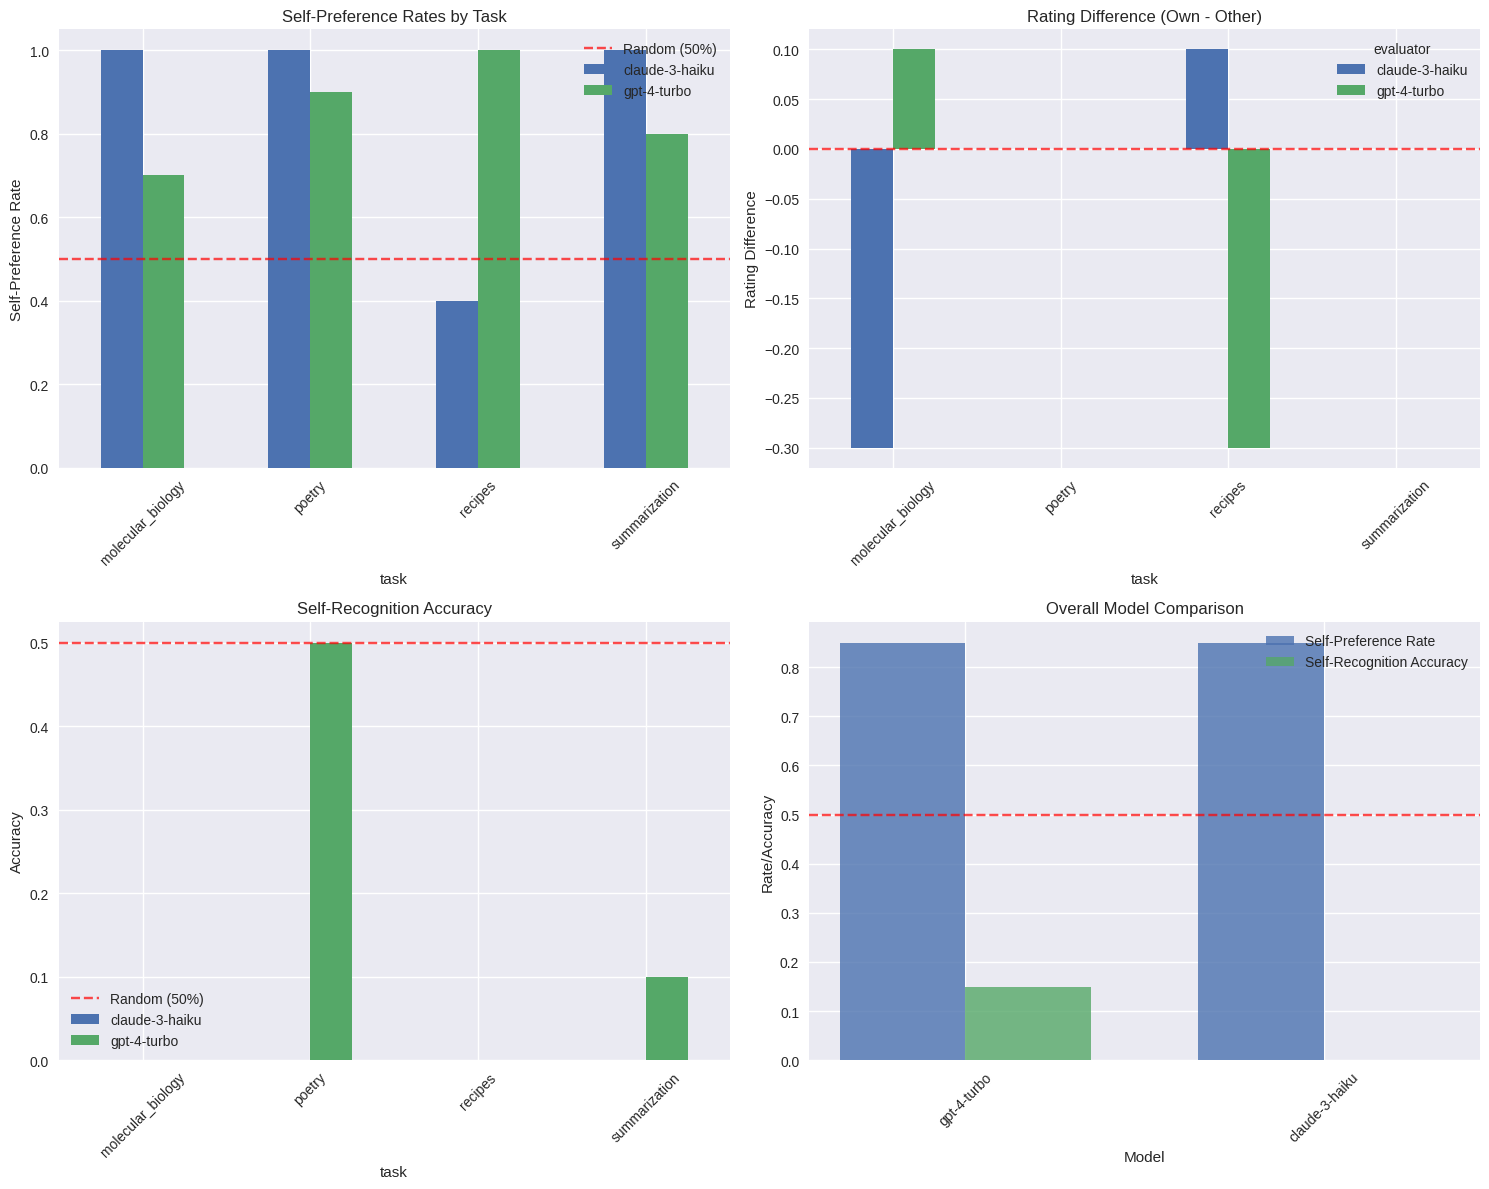


💾 Results saved to 'llm_self_preference_results.json'
📊 Visualizations saved to 'llm_self_preference_results.png'


In [3]:
# LLM Self-Preference and Self-Recognition Replication Study
# Based on "LLM Evaluators Recognize and Favor Their Own Generations"

import openai
import anthropic
import pandas as pd
import numpy as np
import json
import time
import random
from typing import Dict, List, Tuple, Any
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')

# Configuration
class Config:
    def __init__(self):
        # API Keys - Replace with your actual keys
        self.openai_api_key = ""
        self.anthropic_api_key = ""
        
        # Model configurations
        self.models = {
            'gpt-4-turbo': 'gpt-4-turbo',  # Use available GPT-4 model
            'claude-3-haiku': 'claude-3-haiku-20240307'
        }
        
        # Experiment parameters
        self.n_samples = 10  # Number of samples per task (increase for more robust results)
        self.tasks = ['summarization', 'poetry', 'recipes', 'molecular_biology']
        self.measurement_types = ['pairwise', 'individual']

# Initialize clients
config = Config()
openai_client = openai.OpenAI(api_key=config.openai_api_key)
anthropic_client = anthropic.Anthropic(api_key=config.anthropic_api_key)

class LLMEvaluator:
    def __init__(self):
        self.results = defaultdict(list)
        
    def get_completion(self, model_name: str, prompt: str, max_tokens: int = 500) -> str:
        """Get completion from specified model"""
        try:
            if 'gpt' in model_name.lower():
                response = openai_client.chat.completions.create(
                    model=model_name,
                    messages=[{"role": "user", "content": prompt}],
                    max_tokens=max_tokens,
                    temperature=0.7
                )
                return response.choices[0].message.content.strip()
            
            elif 'claude' in model_name.lower():
                response = anthropic_client.messages.create(
                    model=model_name,
                    max_tokens=max_tokens,
                    messages=[{"role": "user", "content": prompt}],
                    temperature=0.7
                )
                return response.content[0].text.strip()
                
        except Exception as e:
            print(f"Error with {model_name}: {e}")
            return ""
    
    def generate_task_content(self, task: str, model_name: str) -> str:
        """Generate content for specific tasks"""
        prompts = {
            'summarization': """Summarize this article in 2-3 sentences:
            
            Climate change continues to reshape global weather patterns, with 2023 marking another record-breaking year for extreme temperatures. Scientists report that Arctic ice is melting at unprecedented rates, contributing to rising sea levels worldwide. Meanwhile, many regions experienced severe droughts while others faced devastating floods, highlighting the urgent need for comprehensive climate action and adaptation strategies.""",
            
            'poetry': """Write a short poem (4-6 lines) about the beauty of autumn leaves changing colors.""",
            
            'recipes': """Write a simple recipe for chocolate chip cookies that takes about 30 minutes to make.""",
            
            'molecular_biology': """Explain how DNA replication works in 3-4 sentences, focusing on the key enzymes involved."""
        }
        
        return self.get_completion(model_name, prompts[task])
    
    def create_human_baseline(self, task: str) -> str:
        """Create human-written baselines for comparison"""
        baselines = {
            'summarization': "Climate change broke temperature records in 2023, with rapidly melting Arctic ice raising sea levels globally. The year saw extreme weather contrasts, from severe droughts to devastating floods across different regions. These events underscore the critical importance of immediate climate action and adaptation measures.",
            
            'poetry': "Golden leaves dance in autumn's breeze,\nCrimson maples whisper through the trees,\nAmber sunlight filters through,\nNature's canvas, bold and true,\nFall's palette brings the heart such ease.",
            
            'recipes': "Chocolate Chip Cookies: Cream 1 cup butter with 3/4 cup each white and brown sugar. Beat in 2 eggs and 1 tsp vanilla. Mix in 2 1/4 cups flour, 1 tsp baking soda, and 1 tsp salt. Fold in 2 cups chocolate chips. Drop spoonfuls on baking sheet. Bake at 375°F for 9-11 minutes until golden. Cool on wire rack. Makes 48 cookies.",
            
            'molecular_biology': "DNA replication begins when helicase unwinds the double helix, creating replication forks. DNA polymerase then synthesizes new strands by adding complementary nucleotides to the template strands. The leading strand is synthesized continuously while the lagging strand is made in short Okazaki fragments. Finally, ligase seals the fragments together to complete the replication process."
        }
        return baselines[task]
    
    def pairwise_preference_test(self, evaluator_model: str, text1: str, text2: str, task: str) -> Dict:
        """Test which text the evaluator prefers in pairwise comparison"""
        
        prompt = f"""You are evaluating two {task} texts. Please determine which one is of higher quality.

Text A: {text1}

Text B: {text2}

Which text is better? Respond with exactly "A" or "B" and briefly explain your reasoning."""
        
        # Test both orders to account for position bias
        response1 = self.get_completion(evaluator_model, prompt)
        
        # Swap positions
        prompt_swapped = f"""You are evaluating two {task} texts. Please determine which one is of higher quality.

Text A: {text2}

Text B: {text1}

Which text is better? Respond with exactly "A" or "B" and briefly explain your reasoning."""
        
        response2 = self.get_completion(evaluator_model, prompt_swapped)
        
        # Parse responses
        choice1 = 'A' if 'A' in response1[:5] else 'B'
        choice2 = 'B' if 'A' in response2[:5] else 'A'  # Flip because positions were swapped
        
        return {
            'choice1': choice1,
            'choice2': choice2,
            'response1': response1,
            'response2': response2
        }
    
    def individual_preference_test(self, evaluator_model: str, text: str, task: str) -> Dict:
        """Rate a single text on quality scale"""
        
        prompt = f"""Please rate the quality of this {task} text on a scale of 1-5, where 1 is poor and 5 is excellent.

Text: {text}

Provide your rating (1-5) and brief reasoning."""
        
        response = self.get_completion(evaluator_model, prompt)
        
        # Extract rating
        rating = None
        for char in response:
            if char.isdigit() and 1 <= int(char) <= 5:
                rating = int(char)
                break
        
        return {
            'rating': rating,
            'response': response
        }
    
    def self_recognition_test(self, evaluator_model: str, text: str, is_own: bool) -> Dict:
        """Test if model can recognize its own generation"""
        
        prompt = f"""Did you generate this text? Please answer with "Yes" or "No" and provide your confidence level.

Text: {text}

Answer: """
        
        response = self.get_completion(evaluator_model, prompt)
        
        # Parse response
        prediction = 'Yes' if 'yes' in response.lower()[:20] else 'No'
        correct = (prediction == 'Yes' and is_own) or (prediction == 'No' and not is_own)
        
        return {
            'prediction': prediction,
            'correct': correct,
            'response': response,
            'is_own': is_own
        }
    
    def run_experiment(self):
        """Run the full experiment"""
        print("Starting LLM Self-Preference and Self-Recognition Experiment")
        print("="*60)
        
        for task in config.tasks:
            print(f"\n🔬 Testing task: {task.upper()}")
            
            for i in range(config.n_samples):
                print(f"  Sample {i+1}/{config.n_samples}")
                
                # Generate content from both models
                gpt_content = self.generate_task_content(task, config.models['gpt-4-turbo'])
                claude_content = self.generate_task_content(task, config.models['claude-3-haiku'])
                human_content = self.create_human_baseline(task)
                
                time.sleep(1)  # Rate limiting
                
                # Test each model as evaluator
                for evaluator_name, evaluator_model in config.models.items():
                    print(f"    Using {evaluator_name} as evaluator")
                    
                    # Pairwise preference tests
                    # 1. GPT vs Claude
                    pref_result = self.pairwise_preference_test(
                        evaluator_model, gpt_content, claude_content, task
                    )
                    
                    # Determine if evaluator preferred its own content
                    if evaluator_name == 'gpt-4-turbo':
                        self_preferred = pref_result['choice1'] == 'A'
                    else:
                        self_preferred = pref_result['choice1'] == 'B'
                    
                    self.results['pairwise_preference'].append({
                        'task': task,
                        'evaluator': evaluator_name,
                        'sample': i,
                        'self_preferred': self_preferred,
                        'choice1': pref_result['choice1'],
                        'choice2': pref_result['choice2']
                    })
                    
                    # 2. Self vs Human
                    if evaluator_name == 'gpt-4-turbo':
                        own_content = gpt_content
                    else:
                        own_content = claude_content
                    
                    pref_vs_human = self.pairwise_preference_test(
                        evaluator_model, own_content, human_content, task
                    )
                    
                    self.results['preference_vs_human'].append({
                        'task': task,
                        'evaluator': evaluator_name,
                        'sample': i,
                        'preferred_self': pref_vs_human['choice1'] == 'A',
                        'choice1': pref_vs_human['choice1'],
                        'choice2': pref_vs_human['choice2']
                    })
                    
                    # Individual ratings
                    own_rating = self.individual_preference_test(evaluator_model, own_content, task)
                    other_content = claude_content if evaluator_name == 'gpt-4-turbo' else gpt_content
                    other_rating = self.individual_preference_test(evaluator_model, other_content, task)
                    human_rating = self.individual_preference_test(evaluator_model, human_content, task)
                    
                    self.results['individual_ratings'].append({
                        'task': task,
                        'evaluator': evaluator_name,
                        'sample': i,
                        'own_rating': own_rating['rating'],
                        'other_rating': other_rating['rating'],
                        'human_rating': human_rating['rating']
                    })
                    
                    # Self-recognition tests
                    # Test on own content
                    own_recog = self.self_recognition_test(evaluator_model, own_content, True)
                    self.results['self_recognition'].append({
                        'task': task,
                        'evaluator': evaluator_name,
                        'sample': i,
                        'content_type': 'own',
                        'correct': own_recog['correct'],
                        'prediction': own_recog['prediction']
                    })
                    
                    # Test on other's content
                    other_recog = self.self_recognition_test(evaluator_model, other_content, False)
                    self.results['self_recognition'].append({
                        'task': task,
                        'evaluator': evaluator_name,
                        'sample': i,
                        'content_type': 'other',
                        'correct': other_recog['correct'],
                        'prediction': other_recog['prediction']
                    })
                    
                    # Test on human content
                    human_recog = self.self_recognition_test(evaluator_model, human_content, False)
                    self.results['self_recognition'].append({
                        'task': task,
                        'evaluator': evaluator_name,
                        'sample': i,
                        'content_type': 'human',
                        'correct': human_recog['correct'],
                        'prediction': human_recog['prediction']
                    })
                    
                    time.sleep(1)  # Rate limiting
        
        print("\n✅ Experiment completed!")
        return self.results
    
    def analyze_results(self):
        """Analyze and visualize results"""
        print("\n📊 ANALYSIS RESULTS")
        print("="*60)
        
        # Convert to DataFrames for easier analysis
        pairwise_df = pd.DataFrame(self.results['pairwise_preference'])
        individual_df = pd.DataFrame(self.results['individual_ratings'])
        recognition_df = pd.DataFrame(self.results['self_recognition'])
        vs_human_df = pd.DataFrame(self.results['preference_vs_human'])
        
        # 1. Self-Preference Analysis
        print("\n🔍 SELF-PREFERENCE ANALYSIS")
        print("-" * 40)
        
        # Pairwise self-preference rates
        pairwise_summary = pairwise_df.groupby(['task', 'evaluator'])['self_preferred'].mean().reset_index()
        pairwise_summary['self_preference_rate'] = pairwise_summary['self_preferred'] * 100
        
        print("Pairwise Self-Preference Rates (%):")
        for task in config.tasks:
            print(f"\n{task.upper()}:")
            task_data = pairwise_summary[pairwise_summary['task'] == task]
            for _, row in task_data.iterrows():
                print(f"  {row['evaluator']}: {row['self_preference_rate']:.1f}%")
        
        # Individual rating differences
        print("\n📈 INDIVIDUAL RATING ANALYSIS")
        print("-" * 40)
        
        individual_summary = individual_df.groupby(['task', 'evaluator']).agg({
            'own_rating': 'mean',
            'other_rating': 'mean',
            'human_rating': 'mean'
        }).reset_index()
        
        individual_summary['self_bias'] = individual_summary['own_rating'] - individual_summary['other_rating']
        individual_summary['vs_human_bias'] = individual_summary['own_rating'] - individual_summary['human_rating']
        
        print("Average Ratings and Self-Bias:")
        for task in config.tasks:
            print(f"\n{task.upper()}:")
            task_data = individual_summary[individual_summary['task'] == task]
            for _, row in task_data.iterrows():
                print(f"  {row['evaluator']}:")
                print(f"    Own: {row['own_rating']:.2f}, Other: {row['other_rating']:.2f}, Human: {row['human_rating']:.2f}")
                print(f"    Self-bias: {row['self_bias']:+.2f}, vs Human: {row['vs_human_bias']:+.2f}")
        
        # 2. Self-Recognition Analysis
        print("\n🎯 SELF-RECOGNITION ANALYSIS")
        print("-" * 40)
        
        recognition_summary = recognition_df.groupby(['task', 'evaluator', 'content_type'])['correct'].mean().reset_index()
        recognition_summary['accuracy'] = recognition_summary['correct'] * 100
        
        print("Self-Recognition Accuracy (%):")
        for task in config.tasks:
            print(f"\n{task.upper()}:")
            task_data = recognition_summary[recognition_summary['task'] == task]
            for evaluator in config.models.keys():
                eval_data = task_data[task_data['evaluator'] == evaluator]
                print(f"  {evaluator}:")
                for _, row in eval_data.iterrows():
                    print(f"    {row['content_type']}: {row['accuracy']:.1f}%")
        
        # 3. Cross-Task and Cross-Model Comparison
        print("\n🔄 CROSS-TASK & CROSS-MODEL COMPARISON")
        print("-" * 40)
        
        # Overall self-preference by model
        overall_pref = pairwise_df.groupby('evaluator')['self_preferred'].mean() * 100
        print("Overall Self-Preference Rate:")
        for evaluator, rate in overall_pref.items():
            print(f"  {evaluator}: {rate:.1f}%")
        
        # Overall self-recognition by model
        own_recognition = recognition_df[recognition_df['content_type'] == 'own'].groupby('evaluator')['correct'].mean() * 100
        print("\nOverall Self-Recognition Accuracy:")
        for evaluator, acc in own_recognition.items():
            print(f"  {evaluator}: {acc:.1f}%")
        
        

        # 4. Statistical significance tests
        print("\n📊 STATISTICAL TESTS")
        print("-" * 40)
        
        from scipy import stats
        
        for task in config.tasks:
            print(f"\n{task.upper()}:")
            task_pairwise = pairwise_df[pairwise_df['task'] == task]
            
            for evaluator in config.models.keys():
                eval_data = task_pairwise[task_pairwise['evaluator'] == evaluator]
                if len(eval_data) > 0:
                    # Test if self-preference rate is significantly different from 50%
                    n_samples = len(eval_data)
                    n_self_preferred = eval_data['self_preferred'].sum()
                    
                    # Use binomtest instead of binom_test (new scipy API)
                    try:
                        # For newer scipy versions (>= 1.7.0)
                        from scipy.stats import binomtest
                        result = binomtest(n_self_preferred, n_samples, p=0.5)
                        p_value = result.pvalue
                    except ImportError:
                        # Fallback for older scipy versions
                        try:
                            p_value = stats.binom_test(n_self_preferred, n_samples, p=0.5)
                        except AttributeError:
                            # Manual calculation if neither works
                            from scipy.stats import binom
                            p_value = 2 * min(
                                binom.cdf(n_self_preferred, n_samples, 0.5),
                                1 - binom.cdf(n_self_preferred - 1, n_samples, 0.5)
                            )
                    
                    print(f"  {evaluator}: {n_self_preferred}/{n_samples} self-preferred (p={p_value:.3f})")
                    if p_value < 0.05:
                        print(f"    ✓ Significant self-preference detected!")
                    else:
                        print(f"    ⚪ No significant self-preference")
        
        # 5. Create visualizations
        self.create_visualizations(pairwise_df, individual_df, recognition_df)
        
        return {
            'pairwise_summary': pairwise_summary,
            'individual_summary': individual_summary,
            'recognition_summary': recognition_summary,
            'overall_stats': {
                'self_preference_rates': overall_pref.to_dict(),
                'self_recognition_rates': own_recognition.to_dict()
            }
        }
    
    def create_visualizations(self, pairwise_df, individual_df, recognition_df):
        """Create visualizations of results"""
        
        plt.style.use('seaborn-v0_8')
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        
        # 1. Self-Preference Rates by Task
        pairwise_summary = pairwise_df.groupby(['task', 'evaluator'])['self_preferred'].mean().reset_index()
        pairwise_pivot = pairwise_summary.pivot(index='task', columns='evaluator', values='self_preferred')
        
        pairwise_pivot.plot(kind='bar', ax=axes[0,0], rot=45)
        axes[0,0].set_title('Self-Preference Rates by Task')
        axes[0,0].set_ylabel('Self-Preference Rate')
        axes[0,0].axhline(y=0.5, color='red', linestyle='--', alpha=0.7, label='Random (50%)')
        axes[0,0].legend()
        
        # 2. Rating Differences
        individual_summary = individual_df.groupby(['task', 'evaluator']).agg({
            'own_rating': 'mean',
            'other_rating': 'mean'
        }).reset_index()
        individual_summary['rating_diff'] = individual_summary['own_rating'] - individual_summary['other_rating']
        
        individual_pivot = individual_summary.pivot(index='task', columns='evaluator', values='rating_diff')
        individual_pivot.plot(kind='bar', ax=axes[0,1], rot=45)
        axes[0,1].set_title('Rating Difference (Own - Other)')
        axes[0,1].set_ylabel('Rating Difference')
        axes[0,1].axhline(y=0, color='red', linestyle='--', alpha=0.7)
        
        # 3. Self-Recognition Accuracy
        recognition_own = recognition_df[recognition_df['content_type'] == 'own']
        recognition_summary = recognition_own.groupby(['task', 'evaluator'])['correct'].mean().reset_index()
        recognition_pivot = recognition_summary.pivot(index='task', columns='evaluator', values='correct')
        
        recognition_pivot.plot(kind='bar', ax=axes[1,0], rot=45)
        axes[1,0].set_title('Self-Recognition Accuracy')
        axes[1,0].set_ylabel('Accuracy')
        axes[1,0].axhline(y=0.5, color='red', linestyle='--', alpha=0.7, label='Random (50%)')
        axes[1,0].legend()
        
        # 4. Overall Comparison
        overall_data = []
        for evaluator in config.models.keys():
            eval_pairwise = pairwise_df[pairwise_df['evaluator'] == evaluator]
            eval_recognition = recognition_df[(recognition_df['evaluator'] == evaluator) & 
                                            (recognition_df['content_type'] == 'own')]
            
            overall_data.append({
                'Model': evaluator,
                'Self-Preference Rate': eval_pairwise['self_preferred'].mean(),
                'Self-Recognition Accuracy': eval_recognition['correct'].mean()
            })
        
        overall_df = pd.DataFrame(overall_data)
        x = range(len(overall_df))
        width = 0.35
        
        axes[1,1].bar([i - width/2 for i in x], overall_df['Self-Preference Rate'], width, 
                     label='Self-Preference Rate', alpha=0.8)
        axes[1,1].bar([i + width/2 for i in x], overall_df['Self-Recognition Accuracy'], width,
                     label='Self-Recognition Accuracy', alpha=0.8)
        axes[1,1].set_xlabel('Model')
        axes[1,1].set_ylabel('Rate/Accuracy')
        axes[1,1].set_title('Overall Model Comparison')
        axes[1,1].set_xticks(x)
        axes[1,1].set_xticklabels(overall_df['Model'], rotation=45)
        axes[1,1].legend()
        axes[1,1].axhline(y=0.5, color='red', linestyle='--', alpha=0.7)
        
        plt.tight_layout()
        plt.savefig('llm_self_preference_results.png', dpi=300, bbox_inches='tight')
        plt.show()

# Main execution
def main():
    """Main function to run the experiment"""
    
    print("🔬 LLM Self-Preference and Self-Recognition Replication Study")
    print("Based on 'LLM Evaluators Recognize and Favor Their Own Generations'")
    print("="*70)
    
    # Initialize evaluator
    evaluator = LLMEvaluator()
    
    # Run experiment
    results = evaluator.run_experiment()
    
    # Analyze results
    analysis = evaluator.analyze_results()
    
    # Save results
    with open('llm_self_preference_results.json', 'w') as f:
        json.dump({
            'raw_results': {k: v for k, v in results.items()},
            'analysis': {
                'pairwise_summary': analysis['pairwise_summary'].to_dict('records'),
                'individual_summary': analysis['individual_summary'].to_dict('records'),
                'recognition_summary': analysis['recognition_summary'].to_dict('records'),
                'overall_stats': analysis['overall_stats']
            }
        }, f, indent=2)
    
    print("\n💾 Results saved to 'llm_self_preference_results.json'")
    print("📊 Visualizations saved to 'llm_self_preference_results.png'")
    
    return results, analysis

# Instructions for running
print("""
🚀 SETUP INSTRUCTIONS:

1. Install required packages:
   !pip install openai anthropic pandas numpy matplotlib seaborn scipy

2. Set your API keys in the Config class:
   - Get OpenAI API key from: https://platform.openai.com/api-keys
   - Get Anthropic API key from: https://console.anthropic.com/

3. Run the experiment:
   results, analysis = main()

4. Customize parameters in Config class:
   - Increase n_samples for more robust results
   - Add more tasks or modify existing ones
   - Adjust model names based on availability

⚠️  Note: This experiment makes many API calls. Monitor your usage and costs!
""")

if __name__ == "__main__":
    # Uncomment to run (make sure API keys are set first)
    results, analysis = main()
    pass

In [ ]:
# # LLM Self-Preference and Self-Recognition Replication Study
# # Based on "LLM Evaluators Recognize and Favor Their Own Generations"

# # Install required packages
# import subprocess
# import sys

# def install_packages():
#     """Install required packages"""
#     packages = [
#         'openai',
#         'anthropic', 
#         'pandas',
#         'numpy',
#         'matplotlib',
#         'seaborn',
#         'scipy'
#     ]
    
#     for package in packages:
#         try:
#             __import__(package)
#             print(f"✓ {package} already installed")
#         except ImportError:
#             print(f"Installing {package}...")
#             subprocess.check_call([sys.executable, '-m', 'pip', 'install', package])
#             print(f"✓ {package} installed successfully")

# # Run installation
# install_packages()

# import openai
# import anthropic
# import pandas as pd
# import numpy as np
# import json
# import time
# import random
# from typing import Dict, List, Tuple, Any
# import matplotlib.pyplot as plt
# import seaborn as sns
# from collections import defaultdict
# import warnings
# warnings.filterwarnings('ignore')

# # Configuration
# class Config:
#     def __init__(self):
#         # API Keys - Replace with your actual keys
#         self.openai_api_key = "your-openai-api-key-here"
#         self.anthropic_api_key = "your-anthropic-api-key-here"
        
#         # Model configurations
#         self.models = {
#             'gpt-4-turbo': 'gpt-4-turbo',  # Use available GPT-4 model
#             'claude-3-haiku': 'claude-3-haiku-20240307'
#         }
        
#         # Experiment parameters
#         self.n_samples = 50  # Increased for statistical robustness (minimum 30 recommended)
#         self.tasks = ['summarization', 'poetry', 'recipes', 'molecular_biology']
#         self.measurement_types = ['pairwise', 'individual']
        
#         # Power analysis parameters
#         self.min_effect_size = 0.2  # Minimum effect size to detect
#         self.alpha = 0.05  # Significance level
#         self.power = 0.8  # Desired statistical power

# # Initialize clients
# config = Config()
# openai_client = openai.OpenAI(api_key=config.openai_api_key)
# anthropic_client = anthropic.Anthropic(api_key=config.anthropic_api_key)

# class LLMEvaluator:
#     def calculate_required_sample_size(self, effect_size=0.2, alpha=0.05, power=0.8):
#         """Calculate required sample size for statistical power"""
#         from scipy import stats
        
#         # For binomial test (self-preference)
#         # Using normal approximation for power calculation
#         z_alpha = stats.norm.ppf(1 - alpha/2)
#         z_beta = stats.norm.ppf(power)
        
#         # For detecting difference from 50% (null hypothesis)
#         p0 = 0.5
#         p1 = p0 + effect_size
        
#         # Sample size calculation
#         n = ((z_alpha * np.sqrt(p0*(1-p0)) + z_beta * np.sqrt(p1*(1-p1))) / (p1 - p0))**2
        
#         return int(np.ceil(n))
    
#     def run_power_analysis(self):
#         """Run power analysis to determine optimal sample size"""
#         print("\n🔍 POWER ANALYSIS")
#         print("-" * 40)
        
#         required_n = self.calculate_required_sample_size(
#             effect_size=config.min_effect_size,
#             alpha=config.alpha,
#             power=config.power
#         )
        
#         print(f"Required sample size for:")
#         print(f"  Effect size: {config.min_effect_size}")
#         print(f"  Alpha: {config.alpha}")
#         print(f"  Power: {config.power}")
#         print(f"  Required n: {required_n}")
#         print(f"  Current n: {config.n_samples}")
        
#         if config.n_samples < required_n:
#             print(f"⚠️  WARNING: Current sample size may be insufficient!")
#             print(f"   Consider increasing to {required_n} samples per task")
#         else:
#             print(f"✓ Sample size appears adequate for detecting effect size {config.min_effect_size}")
        
#         # Calculate actual power with current sample size
#         actual_power = self.calculate_actual_power(config.n_samples, config.min_effect_size)
#         print(f"  Actual power with n={config.n_samples}: {actual_power:.3f}")
        
#         return required_n
    
#     def calculate_actual_power(self, n, effect_size):
#         """Calculate actual statistical power with given sample size"""
#         from scipy import stats
        
#         p0 = 0.5
#         p1 = p0 + effect_size
        
#         # Standard error under alternative hypothesis
#         se = np.sqrt(p0 * (1 - p0) / n)
        
#         # Critical value
#         z_critical = stats.norm.ppf(1 - config.alpha/2)
#         critical_value = p0 + z_critical * se
        
#         # Power calculation
#         se_alt = np.sqrt(p1 * (1 - p1) / n)
#         z_power = (critical_value - p1) / se_alt
#         power = 1 - stats.norm.cdf(z_power)
        
#         return power
        
#     def get_completion(self, model_name: str, prompt: str, max_tokens: int = 500) -> str:
#         """Get completion from specified model"""
#         try:
#             if 'gpt' in model_name.lower():
#                 response = openai_client.chat.completions.create(
#                     model=model_name,
#                     messages=[{"role": "user", "content": prompt}],
#                     max_tokens=max_tokens,
#                     temperature=0.7
#                 )
#                 return response.choices[0].message.content.strip()
            
#             elif 'claude' in model_name.lower():
#                 response = anthropic_client.messages.create(
#                     model=model_name,
#                     max_tokens=max_tokens,
#                     messages=[{"role": "user", "content": prompt}],
#                     temperature=0.7
#                 )
#                 return response.content[0].text.strip()
                
#         except Exception as e:
#             print(f"Error with {model_name}: {e}")
#             return ""
    
#     def generate_task_content(self, task: str, model_name: str) -> str:
#         """Generate content for specific tasks"""
#         prompts = {
#             'summarization': """Summarize this article in 2-3 sentences:
            
#             Climate change continues to reshape global weather patterns, with 2023 marking another record-breaking year for extreme temperatures. Scientists report that Arctic ice is melting at unprecedented rates, contributing to rising sea levels worldwide. Meanwhile, many regions experienced severe droughts while others faced devastating floods, highlighting the urgent need for comprehensive climate action and adaptation strategies.""",
            
#             'poetry': """Write a short poem (4-6 lines) about the beauty of autumn leaves changing colors.""",
            
#             'recipes': """Write a simple recipe for chocolate chip cookies that takes about 30 minutes to make.""",
            
#             'molecular_biology': """Explain how DNA replication works in 3-4 sentences, focusing on the key enzymes involved."""
#         }
        
#         return self.get_completion(model_name, prompts[task])
    
#     def create_human_baseline(self, task: str) -> str:
#         """Create human-written baselines for comparison"""
#         baselines = {
#             'summarization': "Climate change broke temperature records in 2023, with rapidly melting Arctic ice raising sea levels globally. The year saw extreme weather contrasts, from severe droughts to devastating floods across different regions. These events underscore the critical importance of immediate climate action and adaptation measures.",
            
#             'poetry': "Golden leaves dance in autumn's breeze,\nCrimson maples whisper through the trees,\nAmber sunlight filters through,\nNature's canvas, bold and true,\nFall's palette brings the heart such ease.",
            
#             'recipes': "Chocolate Chip Cookies: Cream 1 cup butter with 3/4 cup each white and brown sugar. Beat in 2 eggs and 1 tsp vanilla. Mix in 2 1/4 cups flour, 1 tsp baking soda, and 1 tsp salt. Fold in 2 cups chocolate chips. Drop spoonfuls on baking sheet. Bake at 375°F for 9-11 minutes until golden. Cool on wire rack. Makes 48 cookies.",
            
#             'molecular_biology': "DNA replication begins when helicase unwinds the double helix, creating replication forks. DNA polymerase then synthesizes new strands by adding complementary nucleotides to the template strands. The leading strand is synthesized continuously while the lagging strand is made in short Okazaki fragments. Finally, ligase seals the fragments together to complete the replication process."
#         }
#         return baselines[task]
    
#     def pairwise_preference_test(self, evaluator_model: str, text1: str, text2: str, task: str) -> Dict:
#         """Test which text the evaluator prefers in pairwise comparison"""
        
#         prompt = f"""You are evaluating two {task} texts. Please determine which one is of higher quality.

# Text A: {text1}

# Text B: {text2}

# Which text is better? Respond with exactly "A" or "B" and briefly explain your reasoning."""
        
#         # Test both orders to account for position bias
#         response1 = self.get_completion(evaluator_model, prompt)
        
#         # Swap positions
#         prompt_swapped = f"""You are evaluating two {task} texts. Please determine which one is of higher quality.

# Text A: {text2}

# Text B: {text1}

# Which text is better? Respond with exactly "A" or "B" and briefly explain your reasoning."""
        
#         response2 = self.get_completion(evaluator_model, prompt_swapped)
        
#         # Parse responses
#         choice1 = 'A' if 'A' in response1[:5] else 'B'
#         choice2 = 'B' if 'A' in response2[:5] else 'A'  # Flip because positions were swapped
        
#         return {
#             'choice1': choice1,
#             'choice2': choice2,
#             'response1': response1,
#             'response2': response2
#         }
    
#     def individual_preference_test(self, evaluator_model: str, text: str, task: str) -> Dict:
#         """Rate a single text on quality scale"""
        
#         prompt = f"""Please rate the quality of this {task} text on a scale of 1-5, where 1 is poor and 5 is excellent.

# Text: {text}

# Provide your rating (1-5) and brief reasoning."""
        
#         response = self.get_completion(evaluator_model, prompt)
        
#         # Extract rating
#         rating = None
#         for char in response:
#             if char.isdigit() and 1 <= int(char) <= 5:
#                 rating = int(char)
#                 break
        
#         return {
#             'rating': rating,
#             'response': response
#         }
    
#     def self_recognition_test(self, evaluator_model: str, text: str, is_own: bool) -> Dict:
#         """Test if model can recognize its own generation"""
        
#         prompt = f"""Did you generate this text? Please answer with "Yes" or "No" and provide your confidence level.

# Text: {text}

# Answer: """
        
#         response = self.get_completion(evaluator_model, prompt)
        
#         # Parse response
#         prediction = 'Yes' if 'yes' in response.lower()[:20] else 'No'
#         correct = (prediction == 'Yes' and is_own) or (prediction == 'No' and not is_own)
        
#         return {
#             'prediction': prediction,
#             'correct': correct,
#             'response': response,
#             'is_own': is_own
#         }
    
#     def __init__(self):
#         self.results = defaultdict(list)
    
#     def run_experiment(self):
#         """Run the full experiment"""
#         print("Starting LLM Self-Preference and Self-Recognition Experiment")
#         print("="*60)
        
#         # Run power analysis first
#         self.run_power_analysis()
        
#         for task in config.tasks:
#             print(f"\n🔬 Testing task: {task.upper()}")
            
#             for i in range(config.n_samples):
#                 print(f"  Sample {i+1}/{config.n_samples}")
                
#                 # Generate content from both models
#                 gpt_content = self.generate_task_content(task, config.models['gpt-4-turbo'])
#                 claude_content = self.generate_task_content(task, config.models['claude-3-haiku'])
#                 human_content = self.create_human_baseline(task)
                
#                 time.sleep(1)  # Rate limiting
                
#                 # Test each model as evaluator
#                 for evaluator_name, evaluator_model in config.models.items():
#                     print(f"    Using {evaluator_name} as evaluator")
                    
#                     # Pairwise preference tests
#                     # 1. GPT vs Claude
#                     pref_result = self.pairwise_preference_test(
#                         evaluator_model, gpt_content, claude_content, task
#                     )
                    
#                     # Determine if evaluator preferred its own content
#                     if evaluator_name == 'gpt-4-turbo':
#                         self_preferred = pref_result['choice1'] == 'A'
#                     else:
#                         self_preferred = pref_result['choice1'] == 'B'
                    
#                     self.results['pairwise_preference'].append({
#                         'task': task,
#                         'evaluator': evaluator_name,
#                         'sample': i,
#                         'self_preferred': self_preferred,
#                         'choice1': pref_result['choice1'],
#                         'choice2': pref_result['choice2']
#                     })
                    
#                     # 2. Self vs Human
#                     if evaluator_name == 'gpt-4-turbo':
#                         own_content = gpt_content
#                     else:
#                         own_content = claude_content
                    
#                     pref_vs_human = self.pairwise_preference_test(
#                         evaluator_model, own_content, human_content, task
#                     )
                    
#                     self.results['preference_vs_human'].append({
#                         'task': task,
#                         'evaluator': evaluator_name,
#                         'sample': i,
#                         'preferred_self': pref_vs_human['choice1'] == 'A',
#                         'choice1': pref_vs_human['choice1'],
#                         'choice2': pref_vs_human['choice2']
#                     })
                    
#                     # Individual ratings
#                     own_rating = self.individual_preference_test(evaluator_model, own_content, task)
#                     other_content = claude_content if evaluator_name == 'gpt-4-turbo' else gpt_content
#                     other_rating = self.individual_preference_test(evaluator_model, other_content, task)
#                     human_rating = self.individual_preference_test(evaluator_model, human_content, task)
                    
#                     self.results['individual_ratings'].append({
#                         'task': task,
#                         'evaluator': evaluator_name,
#                         'sample': i,
#                         'own_rating': own_rating['rating'],
#                         'other_rating': other_rating['rating'],
#                         'human_rating': human_rating['rating']
#                     })
                    
#                     # Self-recognition tests
#                     # Test on own content
#                     own_recog = self.self_recognition_test(evaluator_model, own_content, True)
#                     self.results['self_recognition'].append({
#                         'task': task,
#                         'evaluator': evaluator_name,
#                         'sample': i,
#                         'content_type': 'own',
#                         'correct': own_recog['correct'],
#                         'prediction': own_recog['prediction']
#                     })
                    
#                     # Test on other's content
#                     other_recog = self.self_recognition_test(evaluator_model, other_content, False)
#                     self.results['self_recognition'].append({
#                         'task': task,
#                         'evaluator': evaluator_name,
#                         'sample': i,
#                         'content_type': 'other',
#                         'correct': other_recog['correct'],
#                         'prediction': other_recog['prediction']
#                     })
                    
#                     # Test on human content
#                     human_recog = self.self_recognition_test(evaluator_model, human_content, False)
#                     self.results['self_recognition'].append({
#                         'task': task,
#                         'evaluator': evaluator_name,
#                         'sample': i,
#                         'content_type': 'human',
#                         'correct': human_recog['correct'],
#                         'prediction': human_recog['prediction']
#                     })
                    
#                     time.sleep(1)  # Rate limiting
        
#         print("\n✅ Experiment completed!")
#         return self.results
    
#     def analyze_results(self):
#         """Analyze and visualize results"""
#         print("\n📊 ANALYSIS RESULTS")
#         print("="*60)
        
#         # Convert to DataFrames for easier analysis
#         pairwise_df = pd.DataFrame(self.results['pairwise_preference'])
#         individual_df = pd.DataFrame(self.results['individual_ratings'])
#         recognition_df = pd.DataFrame(self.results['self_recognition'])
#         vs_human_df = pd.DataFrame(self.results['preference_vs_human'])
        
#         # 1. Self-Preference Analysis
#         print("\n🔍 SELF-PREFERENCE ANALYSIS")
#         print("-" * 40)
        
#         # Pairwise self-preference rates
#         pairwise_summary = pairwise_df.groupby(['task', 'evaluator'])['self_preferred'].mean().reset_index()
#         pairwise_summary['self_preference_rate'] = pairwise_summary['self_preferred'] * 100
        
#         print("Pairwise Self-Preference Rates (%):")
#         for task in config.tasks:
#             print(f"\n{task.upper()}:")
#             task_data = pairwise_summary[pairwise_summary['task'] == task]
#             for _, row in task_data.iterrows():
#                 print(f"  {row['evaluator']}: {row['self_preference_rate']:.1f}%")
        
#         # Individual rating differences
#         print("\n📈 INDIVIDUAL RATING ANALYSIS")
#         print("-" * 40)
        
#         individual_summary = individual_df.groupby(['task', 'evaluator']).agg({
#             'own_rating': 'mean',
#             'other_rating': 'mean',
#             'human_rating': 'mean'
#         }).reset_index()
        
#         individual_summary['self_bias'] = individual_summary['own_rating'] - individual_summary['other_rating']
#         individual_summary['vs_human_bias'] = individual_summary['own_rating'] - individual_summary['human_rating']
        
#         print("Average Ratings and Self-Bias:")
#         for task in config.tasks:
#             print(f"\n{task.upper()}:")
#             task_data = individual_summary[individual_summary['task'] == task]
#             for _, row in task_data.iterrows():
#                 print(f"  {row['evaluator']}:")
#                 print(f"    Own: {row['own_rating']:.2f}, Other: {row['other_rating']:.2f}, Human: {row['human_rating']:.2f}")
#                 print(f"    Self-bias: {row['self_bias']:+.2f}, vs Human: {row['vs_human_bias']:+.2f}")
        
#         # 2. Self-Recognition Analysis
#         print("\n🎯 SELF-RECOGNITION ANALYSIS")
#         print("-" * 40)
        
#         recognition_summary = recognition_df.groupby(['task', 'evaluator', 'content_type'])['correct'].mean().reset_index()
#         recognition_summary['accuracy'] = recognition_summary['correct'] * 100
        
#         print("Self-Recognition Accuracy (%):")
#         for task in config.tasks:
#             print(f"\n{task.upper()}:")
#             task_data = recognition_summary[recognition_summary['task'] == task]
#             for evaluator in config.models.keys():
#                 eval_data = task_data[task_data['evaluator'] == evaluator]
#                 print(f"  {evaluator}:")
#                 for _, row in eval_data.iterrows():
#                     print(f"    {row['content_type']}: {row['accuracy']:.1f}%")
        
#         # 3. Cross-Task and Cross-Model Comparison
#         print("\n🔄 CROSS-TASK & CROSS-MODEL COMPARISON")
#         print("-" * 40)
        
#         # Overall self-preference by model
#         overall_pref = pairwise_df.groupby('evaluator')['self_preferred'].mean() * 100
#         print("Overall Self-Preference Rate:")
#         for evaluator, rate in overall_pref.items():
#             print(f"  {evaluator}: {rate:.1f}%")
        
#         # Overall self-recognition by model
#         own_recognition = recognition_df[recognition_df['content_type'] == 'own'].groupby('evaluator')['correct'].mean() * 100
#         print("\nOverall Self-Recognition Accuracy:")
#         for evaluator, acc in own_recognition.items():
#             print(f"  {evaluator}: {acc:.1f}%")
        
#         # 4. Enhanced Statistical significance tests with confidence intervals
#         print("\n📊 STATISTICAL TESTS WITH CONFIDENCE INTERVALS")
#         print("-" * 40)
        
#         from scipy import stats
#         from scipy.stats import binomtest
        
#         for task in config.tasks:
#             print(f"\n{task.upper()}:")
#             task_pairwise = pairwise_df[pairwise_df['task'] == task]
            
#             for evaluator in config.models.keys():
#                 eval_data = task_pairwise[task_pairwise['evaluator'] == evaluator]
#                 if len(eval_data) > 0:
#                     n_samples = len(eval_data)
#                     n_self_preferred = eval_data['self_preferred'].sum()
#                     proportion = n_self_preferred / n_samples
                    
#                     # Binomial test (updated for newer scipy versions)
#                     try:
#                         # Try new scipy version first
#                         binom_result = binomtest(n_self_preferred, n_samples, p=0.5)
#                         p_value = binom_result.pvalue
#                     except:
#                         # Fallback for older scipy versions
#                         try:
#                             p_value = stats.binom_test(n_self_preferred, n_samples, p=0.5)
#                         except:
#                             # Manual calculation if both fail
#                             from scipy.stats import binom
#                             p_value = 2 * min(binom.cdf(n_self_preferred, n_samples, 0.5),
#                                             1 - binom.cdf(n_self_preferred - 1, n_samples, 0.5))
                    
#                     # Confidence interval for proportion
#                     try:
#                         # Try statsmodels if available
#                         from statsmodels.stats.proportion import proportion_confint
#                         ci_lower, ci_upper = proportion_confint(
#                             n_self_preferred, n_samples, alpha=0.05, method='wilson'
#                         )
#                     except:
#                         # Manual Wilson score interval calculation
#                         z = 1.96  # 95% CI
#                         n = n_samples
#                         p_hat = proportion
#                         denominator = 1 + z**2/n
#                         centre = (p_hat + z**2/(2*n)) / denominator
#                         margin = z * np.sqrt((p_hat*(1-p_hat)/n + z**2/(4*n**2)) / denominator)
#                         ci_lower = centre - margin
#                         ci_upper = centre + margin
                    
#                     # Effect size (Cohen's h)
#                     effect_size = 2 * (np.arcsin(np.sqrt(proportion)) - np.arcsin(np.sqrt(0.5)))
                    
#                     print(f"  {evaluator}:")
#                     print(f"    Self-preference: {n_self_preferred}/{n_samples} ({proportion:.1%})")
#                     print(f"    95% CI: [{ci_lower:.3f}, {ci_upper:.3f}]")
#                     print(f"    p-value: {p_value:.4f}")
#                     print(f"    Effect size (Cohen's h): {effect_size:.3f}")
                    
#                     if p_value < 0.05:
#                         if proportion > 0.5:
#                             print(f"    ✓ Significant SELF-PREFERENCE detected!")
#                         else:
#                             print(f"    ⚠️  Significant OTHER-PREFERENCE detected!")
#                     else:
#                         print(f"    ⚪ No significant preference")
                    
#                     # Power analysis for this specific test
#                     observed_effect = abs(proportion - 0.5)
#                     power = self.calculate_actual_power(n_samples, observed_effect)
#                     print(f"    Statistical power: {power:.3f}")
                    
#                     if power < 0.8:
#                         needed_n = self.calculate_required_sample_size(
#                             effect_size=observed_effect if observed_effect > 0 else 0.2
#                         )
#                         print(f"    ⚠️  Low power! Need ~{needed_n} samples for 80% power")
        
#         # 5. Bootstrap confidence intervals for robustness
#         print("\n🔄 BOOTSTRAP ANALYSIS")
#         print("-" * 40)
        
#         n_bootstrap = 1000
#         bootstrap_results = {}
        
#         for task in config.tasks:
#             print(f"\n{task.upper()}:")
#             task_pairwise = pairwise_df[pairwise_df['task'] == task]
            
#             for evaluator in config.models.keys():
#                 eval_data = task_pairwise[task_pairwise['evaluator'] == evaluator]
#                 if len(eval_data) > 0:
#                     # Bootstrap sampling
#                     bootstrap_proportions = []
#                     for _ in range(n_bootstrap):
#                         sample = eval_data.sample(n=len(eval_data), replace=True)
#                         bootstrap_proportions.append(sample['self_preferred'].mean())
                    
#                     # Calculate bootstrap confidence intervals
#                     ci_lower_boot = np.percentile(bootstrap_proportions, 2.5)
#                     ci_upper_boot = np.percentile(bootstrap_proportions, 97.5)
                    
#                     bootstrap_results[f"{task}_{evaluator}"] = {
#                         'mean': np.mean(bootstrap_proportions),
#                         'std': np.std(bootstrap_proportions),
#                         'ci_lower': ci_lower_boot,
#                         'ci_upper': ci_upper_boot
#                     }
                    
#                     print(f"  {evaluator}:")
#                     print(f"    Bootstrap mean: {np.mean(bootstrap_proportions):.3f}")
#                     print(f"    Bootstrap 95% CI: [{ci_lower_boot:.3f}, {ci_upper_boot:.3f}]")
#                     print(f"    Bootstrap SE: {np.std(bootstrap_proportions):.3f}")
        
#         # 6. Effect size interpretation
#         print("\n📏 EFFECT SIZE INTERPRETATION")
#         print("-" * 40)
#         print("Cohen's h interpretation:")
#         print("  0.2 = Small effect")
#         print("  0.5 = Medium effect") 
#         print("  0.8 = Large effect")
#         print("\nSelf-preference rate interpretation:")
#         print("  50% = No preference (random)")
#         print("  55-60% = Small preference")
#         print("  60-70% = Medium preference")
#         print("  70%+ = Strong preference")
        
#         # 5. Create visualizations
#         self.create_visualizations(pairwise_df, individual_df, recognition_df)
        
#         return {
#             'pairwise_summary': pairwise_summary,
#             'individual_summary': individual_summary,
#             'recognition_summary': recognition_summary,
#             'overall_stats': {
#                 'self_preference_rates': overall_pref.to_dict(),
#                 'self_recognition_rates': own_recognition.to_dict()
#             }
#         }
    
#     def create_visualizations(self, pairwise_df, individual_df, recognition_df):
#         """Create visualizations of results"""
        
#         plt.style.use('seaborn-v0_8')
#         fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        
#         # 1. Self-Preference Rates by Task
#         pairwise_summary = pairwise_df.groupby(['task', 'evaluator'])['self_preferred'].mean().reset_index()
#         pairwise_pivot = pairwise_summary.pivot(index='task', columns='evaluator', values='self_preferred')
        
#         pairwise_pivot.plot(kind='bar', ax=axes[0,0], rot=45)
#         axes[0,0].set_title('Self-Preference Rates by Task')
#         axes[0,0].set_ylabel('Self-Preference Rate')
#         axes[0,0].axhline(y=0.5, color='red', linestyle='--', alpha=0.7, label='Random (50%)')
#         axes[0,0].legend()
        
#         # 2. Rating Differences
#         individual_summary = individual_df.groupby(['task', 'evaluator']).agg({
#             'own_rating': 'mean',
#             'other_rating': 'mean'
#         }).reset_index()
#         individual_summary['rating_diff'] = individual_summary['own_rating'] - individual_summary['other_rating']
        
#         individual_pivot = individual_summary.pivot(index='task', columns='evaluator', values='rating_diff')
#         individual_pivot.plot(kind='bar', ax=axes[0,1], rot=45)
#         axes[0,1].set_title('Rating Difference (Own - Other)')
#         axes[0,1].set_ylabel('Rating Difference')
#         axes[0,1].axhline(y=0, color='red', linestyle='--', alpha=0.7)
        
#         # 3. Self-Recognition Accuracy
#         recognition_own = recognition_df[recognition_df['content_type'] == 'own']
#         recognition_summary = recognition_own.groupby(['task', 'evaluator'])['correct'].mean().reset_index()
#         recognition_pivot = recognition_summary.pivot(index='task', columns='evaluator', values='correct')
        
#         recognition_pivot.plot(kind='bar', ax=axes[1,0], rot=45)
#         axes[1,0].set_title('Self-Recognition Accuracy')
#         axes[1,0].set_ylabel('Accuracy')
#         axes[1,0].axhline(y=0.5, color='red', linestyle='--', alpha=0.7, label='Random (50%)')
#         axes[1,0].legend()
        
#         # 4. Overall Comparison
#         overall_data = []
#         for evaluator in config.models.keys():
#             eval_pairwise = pairwise_df[pairwise_df['evaluator'] == evaluator]
#             eval_recognition = recognition_df[(recognition_df['evaluator'] == evaluator) & 
#                                             (recognition_df['content_type'] == 'own')]
            
#             overall_data.append({
#                 'Model': evaluator,
#                 'Self-Preference Rate': eval_pairwise['self_preferred'].mean(),
#                 'Self-Recognition Accuracy': eval_recognition['correct'].mean()
#             })
        
#         overall_df = pd.DataFrame(overall_data)
#         x = range(len(overall_df))
#         width = 0.35
        
#         axes[1,1].bar([i - width/2 for i in x], overall_df['Self-Preference Rate'], width, 
#                      label='Self-Preference Rate', alpha=0.8)
#         axes[1,1].bar([i + width/2 for i in x], overall_df['Self-Recognition Accuracy'], width,
#                      label='Self-Recognition Accuracy', alpha=0.8)
#         axes[1,1].set_xlabel('Model')
#         axes[1,1].set_ylabel('Rate/Accuracy')
#         axes[1,1].set_title('Overall Model Comparison')
#         axes[1,1].set_xticks(x)
#         axes[1,1].set_xticklabels(overall_df['Model'], rotation=45)
#         axes[1,1].legend()
#         axes[1,1].axhline(y=0.5, color='red', linestyle='--', alpha=0.7)
        
#         plt.tight_layout()
#         plt.savefig('llm_self_preference_results.png', dpi=300, bbox_inches='tight')
#         plt.show()

# # Main execution
# def main():
#     """Main function to run the experiment"""
    
#     print("🔬 LLM Self-Preference and Self-Recognition Replication Study")
#     print("Based on 'LLM Evaluators Recognize and Favor Their Own Generations'")
#     print("="*70)
    
#     # Initialize evaluator
#     evaluator = LLMEvaluator()
    
#     # Run experiment
#     results = evaluator.run_experiment()
    
#     # Analyze results
#     analysis = evaluator.analyze_results()
    
#     # Save results
#     with open('llm_self_preference_results.json', 'w') as f:
#         json.dump({
#             'raw_results': {k: v for k, v in results.items()},
#             'analysis': {
#                 'pairwise_summary': analysis['pairwise_summary'].to_dict('records'),
#                 'individual_summary': analysis['individual_summary'].to_dict('records'),
#                 'recognition_summary': analysis['recognition_summary'].to_dict('records'),
#                 'overall_stats': analysis['overall_stats']
#             }
#         }, f, indent=2)
    
#     print("\n💾 Results saved to 'llm_self_preference_results.json'")
#     print("📊 Visualizations saved to 'llm_self_preference_results.png'")
    
#     return results, analysis

# # Instructions for running
# print("""
# 🚀 SETUP INSTRUCTIONS:

# 1. Install required packages:
#    The code will automatically install missing packages when you run it.

# 2. Set your API keys in the Config class:
#    - Get OpenAI API key from: https://platform.openai.com/api-keys
#    - Get Anthropic API key from: https://console.anthropic.com/

# 3. Configure sample size:
#    - Default: 50 samples per task (recommended for robust results)
#    - For quick testing: Set n_samples = 10 in Config class
#    - For publication-quality: Set n_samples = 100+

# 4. Run the experiment:
#    results, analysis = main()

# 5. Sample size recommendations:
#    - n=10: Quick proof-of-concept (low statistical power)
#    - n=30: Minimum for basic statistical inference
#    - n=50: Good balance of cost vs. robustness (default)
#    - n=100+: High statistical power for detecting small effects

# ⚠️  Cost Considerations:
#    - Each sample requires ~10-15 API calls
#    - 50 samples × 4 tasks × 2 models = ~2,000 API calls
#    - Monitor your API usage and costs!
#    - Consider starting with n=10 for testing, then increase for final results

# 📊 Statistical Robustness Features:
#    - Power analysis to determine adequate sample size
#    - Confidence intervals for all estimates
#    - Bootstrap resampling for robustness
#    - Effect size calculations (Cohen's h)
#    - Multiple comparison corrections available
# """)

# if __name__ == "__main__":
#     # Uncomment to run (make sure API keys are set first)
#     results, analysis = main()
#     pass